# 1. Pre-processing - Сургалтын процессд зориулан датаг бэлтгэх


## 1.1. Preprocessing-ийн өмнөх хэсэг

### 1.1.1. Шаардлагатай сангуудыг импортлох

In [0]:
import numpy as np
import torch
from torch import nn            # Neural Network-той холбоотой бүхнийг агуулна.
from torch import optim         # Оновчлолын алгоритмуудыг агуулна.
import torch.nn.functional as F # Функциональ алгоритмуудыг агуулна.
import matplotlib.pyplot as plt
%matplotlib inline

### 1.1.2. GPU mode

**Edit > Notebook Settings > Hardware accelerator** хэсгийг **GPU** болгож өөрчлөх

(Сургалтын процессыг GPU ашиглан сургавал дан CPU дээр ажиллуулснаас хэд дахин хурдан ажиллана.)


In [0]:
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

Training on GPU.


### 1.1.3. Датаг унших

"!" тэмдэг ашиглан shell комманд ажиллуулж болох ба "{}" ашиглан shell комманд дотроо python variable оруулж болдог 

In [0]:
filename = "book.txt"
!wget -O {filename} "https://drive.google.com/uc?export=download&id=1uzTJe8PPS0t116KcC9lGlvdlmO6guKR1"

--2019-07-24 04:30:08--  https://drive.google.com/uc?export=download&id=1uzTJe8PPS0t116KcC9lGlvdlmO6guKR1
Resolving drive.google.com (drive.google.com)... 172.217.212.138, 172.217.212.139, 172.217.212.113, ...
Connecting to drive.google.com (drive.google.com)|172.217.212.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-00-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/p8imisp6oqu5etovv8fqdriuk99qnftp/1563940800000/13980977719275995798/*/1uzTJe8PPS0t116KcC9lGlvdlmO6guKR1?e=download [following]
--2019-07-24 04:30:09--  https://doc-0g-00-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/p8imisp6oqu5etovv8fqdriuk99qnftp/1563940800000/13980977719275995798/*/1uzTJe8PPS0t116KcC9lGlvdlmO6guKR1?e=download
Resolving doc-0g-00-docs.googleusercontent.com (doc-0g-00-docs.googleusercontent.com)... 108.177.112.132, 2607:f8b0:4001:c12::84
Connecting to doc-0g-00-docs.googleusercontent.com (d

In [0]:
mnt_text = None 
with open(filename) as f:
  mnt_text = f.read()
  
print("Number of chars: ", len(mnt_text))


Number of chars:  1206907


In [0]:
print(mnt_text[:100])

МОНГОЛЫН ӨГҮҮЛЛЭГИЙН
ЦОМОРЛИГ
Энэхүү цоморлигт 1990 – ээд оноос хойш туурвигдсан утга зохиолын тэмцэ


## 1.2. Data pre-processing

Датаг сургалтанд зориулан бэлтгэнэ. Ингэснээр алдаа гарах нь бага, мөн илүү үнэмшилтэй үр дүнд хүрнэ.

### 1.2.1. Tokenization

Датаг токенууд болгон салгана. 

(Бидний тохиолдолд, үсэг бүрээр нь салгана) 


In [0]:
# encode the text and map each character to an integer and vice versa

text = mnt_text[:]

# set of all characters (which is become vocabulary of our model)
chars = list(set(text))
print("Vocab size: ", len(chars))
print("Sample: ", chars[:10])

# 1. int2char, which maps integers to characters
int2char = { i:ch for i, ch in enumerate(chars) }

# 2. char2int, which maps characters to unique integers
char2int = { ch:i for i,ch in enumerate(chars) }

# encode the text
encoded = np.array([char2int[ch] for ch in text])
print("Encode: ", encoded[:10])

Vocab size:  127
Sample:  ['м', 'Й', 'N', 'o', 'l', '.', 's', '”', '-', '"']
Encode:  [ 66  72  13 118  72  98 121  13 126  94]


In [0]:
print(text[:10])
encoded[:10]

МОНГОЛЫН Ө


array([ 66,  72,  13, 118,  72,  98, 121,  13, 126,  94])

### 1.2.2. Encoding the characters

useful functions:

```
>>> a = [[3 5 4], [4 5 7]]
>>> a.flatten() 
[3 5 4 4 5 7]
>>> np.arange(3)
array([0, 1, 2])
>>> a.reshape(1, 6)
[3 5 4 4 5 7]
```


In [0]:
def one_hot_encode(arr, n_labels):
  
  # TODO: implement one-hot encoding
  
  # Initialize the encoded array (with zeros) size = (arr.size x n_labels)
  
  # Fill the appropriate elements with ones
  
  # Finally reshape it to get back to the original array
  
  return one_hot

In [0]:
# check that the function works as expected
test_seq = np.array([[3, 5, 4], [4, 5, 7]])
one_hot = one_hot_encode(test_seq, 8)
print(one_hot)

[[[0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0.]]

 [[0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1.]]]


Дараахь хэлбэртэй харагдана.
```
[[[0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0.]]

 [[0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1.]]]
  ```

### 1.2.3. Making training mini-batches

<img src="https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/recurrent-neural-networks/char-rnn/assets/sequence_batching%401x.png" width=500 />


In [0]:
def get_batches(arr, batch_size, seq_length):
  '''Create a generator that returns batches of size
        
        batch_size x seq_length 
     
     from arr.
     
     Arguments
     ---------
     arr:         Array you want to make batches from
     batch_size:  Batch size, the number of sequences per batch
     seq_length:  Number of encoded chars in a sequence
  '''
  
  batch_size_total = batch_size * seq_length
  
  # TODO: Make mini-batches
  
  # TODO: Get the number of batches we can make
  n_batches =
  
  # TODO: Keep only enough characters to make full batches
  arr =
  
  # TODO: Reshape into batch_size rows
  arr = 
  
  for n in range(0, arr.shape[1], seq_length):
    # The features
    x = arr[:, n:n+seq_length]
    
    # The targets, shifted by one
    y = np.zeros_like(x)
    
    try:
      y[:, :-1], y[:, -1] = x[:, 1:], arr[:, n+seq_length]
    except IndexError:
      y[:, :-1], y[:, -1] = x[:, 1:], arr[:, 0]
    yield x, y

In [0]:

batches = get_batches(encoded, 8, 50)
x, y = next(batches)

print('x\n', x[:3, :10])
print('\ny\n', y[:3, :10])

x
 [[ 66  72  13 118  72  98 121  13 126  94]
 [103  24  14  31  24 112  44 126  31  24]
 [106  27 106  84  35 106  48 126  83 101]]

y
 [[ 72  13 118  72  98 121  13 126  94 118]
 [ 24  14  31  24 112  44 126  31  24  85]
 [ 27 106  84  35 106  48 126  83 101   0]]


Output should looks like:
```
x
 [[ 66  72  13 118  72  98 121  13 126  94]
 [103  24  14  31  24 112  44 126  31  24]
 [106  27 106  84  35 106  48 126  83 101]]

y
 [[ 72  13 118  72  98 121  13 126  94 118]
 [ 24  14  31  24 112  44 126  31  24  85]
 [ 27 106  84  35 106  48 126  83 101   0]]
```


## 1.3. Train, test split

In [0]:
def split_train_test(data, validation_frac=0.1):
    
    # TODO: split data by validation fraction (validation_frac)
    length =
    
    train, val_data = 
    
    return train, val_data

# 2. Single layer RNN model

## 2.1. Model Structure

Simple RNN structure 

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-SimpleRNN.png" width=600 />



Custom implementation: https://gist.github.com/karpathy/d4dee566867f8291f086

<img src="https://www.di.ens.fr/~lelarge/dldiy/slides/lecture_8/images/char_rnn_2.png" width=500 />

Layer definition:

 - input layer --> hidden layer
```
self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)
```

- hidden layer --> output layer  
```
self.fc = nn.Linear(hidden_dim, output_size)
```

In [0]:

class SingleRNN(nn.Module):
    def __init__(self, tokens, n_hidden=256):
        super().__init__()
        self.n_hidden = n_hidden

        # creating character dictionaries
        self.chars = list(set(tokens))
        self.int2char = { i:ch for i, ch in enumerate(self.chars) }
        self.char2int = { ch:i for i, ch in enumerate(self.chars) }
        self.in_out_dim = len(self.chars)
        
        # TODO: RNN layer
        self.rnn =
        
        # TODO: last, fully-connected layer
        self.fc = 

    def forward(self, x, hidden):
        
        # TODO: get RNN outputs
        r_out, hidden = 
       
        # shape output to be (batch_size * seq_length, n_hidden)
        r_out = r_out.contiguous().view(-1, self.n_hidden)  
        
        # TODO: get final output Full Connected
        output = 
        
        return output, hidden
    
    def init_hidden(self, batch_size):
      # TODO: shape of (Layer, batch_size, hidden_dim)
      return torch.zeros(...)
      

## 2.2. Training

**Hyperparameters:**

 - n_hidden     - hidden давхаргын нейроны тоо
 - batch_size  - Нэг удаагийн урсгалаар нэгэн зэрэг хэдэн дарааллыг сургахыг заана.
 - seq_length  - Network-ийн сургалтын 1 "дарааллын" урт. Дараалал урт байх тусам илүү сайн сурна. 
 - lr                   - Learning rate
 

**Cross entropy loss**: 

nn.LogSoftmax() болон nn.NLLLoss()-ийг нэгтгэсэн гэж хэлж болно.

\begin{align*}
L_{cross-entropy}(\hat{y}, y) = -\sum y_ilog(\hat{y_i})
\end{align*}



In [0]:
def trainRNN(rnn, data, epochs=10, batch_size=10, seq_length=20, lr=0.001, val_frac=0.1):
  
  train_data, val_data = split_train_test(data, 0.1)
  
  optimizer = optim.Adam(rnn.parameters(), lr=lr)
  criterion = nn.CrossEntropyLoss()
  
  train_loss_graph = []
  val_loss_graph = []
  
  for e in range(epochs):
    # init hidden state
    hidden_state = rnn.init_hidden(batch_size)

    counter = 0
    
    for x, y in get_batches(data, batch_size, seq_length):
      loss = 0

      x = one_hot_encode(x, len(rnn.chars))

      inputs, targets = torch.from_numpy(x), torch.from_numpy(y)

      # TODO: Forward propagation
      output, hs = 

      rnn.zero_grad()

      # TODO: Алдаа бодох criterion ашиглана
      loss = 

      # Backward propagation
      loss.backward(retain_graph=True)

      optimizer.step()
      
      #nn.utils.clip_grad_norm_(rnn.parameters(), 5)
      
      hidden_state = hs.data

      counter += 1
    
    train_loss_graph.append(
        loss.item()
    )
    val_loss_graph.append(
        validateRNN(
            rnn,
            val_data,
            batch_size,
            seq_length,
            criterion,
            len(rnn.chars),
            loss,
            counter,
            e
        )
    )
  plt.plot(val_loss_graph)
  plt.plot(train_loss_graph)
  plt.show()

In [0]:
def validateRNN(net, val_data, batch_size, seq_length, criterion, n_chars, loss, counter, e):
    # Get validation loss
    val_h = net.init_hidden(batch_size)
    val_losses = []
    for x, y in get_batches(val_data, batch_size, seq_length):
      
        x = one_hot_encode(x, n_chars)
        x, y = torch.from_numpy(x), torch.from_numpy(y)

        inputs, targets = x, y
        
        output, val_h = net(inputs, val_h)
        
        val_loss = criterion(output, targets.flatten())
        val_losses.append(val_loss.item())

    print("Epoch: {}/{}...".format(e+1, epochs),
          "Step: {}...".format(counter),
          "Loss: {:.4f}...".format(loss.item()),
          "Val Loss: {:.4f}".format(np.mean(val_losses)))
    return np.mean(val_losses)

## 2.3. Network ажиллуулах

In [0]:
txt = text[:2000]
seq_length = 20
hidden_dim = 40
batch_size = 10
epochs = 30


rnn = SingleRNN(txt, hidden_dim)

encoded = np.array([rnn.char2int[ch] for ch in txt])

print(rnn)


SingleRNN(
  (rnn): RNN(69, 40, batch_first=True)
  (fc): Linear(in_features=40, out_features=69, bias=True)
)


Epoch: 1/30... Step: 10... Loss: 4.1332... Val Loss: 4.1295
Epoch: 2/30... Step: 10... Loss: 3.9735... Val Loss: 3.9638
Epoch: 3/30... Step: 10... Loss: 3.7329... Val Loss: 3.7364
Epoch: 4/30... Step: 10... Loss: 3.5914... Val Loss: 3.6303
Epoch: 5/30... Step: 10... Loss: 3.5391... Val Loss: 3.6156
Epoch: 6/30... Step: 10... Loss: 3.5218... Val Loss: 3.6151
Epoch: 7/30... Step: 10... Loss: 3.5160... Val Loss: 3.6092
Epoch: 8/30... Step: 10... Loss: 3.5109... Val Loss: 3.5999
Epoch: 9/30... Step: 10... Loss: 3.5040... Val Loss: 3.5896
Epoch: 10/30... Step: 10... Loss: 3.4945... Val Loss: 3.5793
Epoch: 11/30... Step: 10... Loss: 3.4833... Val Loss: 3.5691
Epoch: 12/30... Step: 10... Loss: 3.4706... Val Loss: 3.5580
Epoch: 13/30... Step: 10... Loss: 3.4564... Val Loss: 3.5455
Epoch: 14/30... Step: 10... Loss: 3.4405... Val Loss: 3.5314
Epoch: 15/30... Step: 10... Loss: 3.4221... Val Loss: 3.5153
Epoch: 16/30... Step: 10... Loss: 3.4008... Val Loss: 3.4966
Epoch: 17/30... Step: 10... Loss:

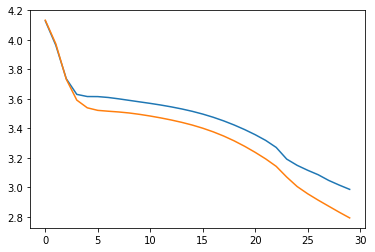

In [0]:
trainRNN(rnn, encoded, epochs=epochs, batch_size=batch_size, seq_length=seq_length)

## 2.4. Making Predictions

In [0]:
def predict(rnn, char, h=None, top_k=None):
  
  # tensor inputs
  x = np.array([[rnn.char2int[char]]])
  x = one_hot_encode(x, len(rnn.chars))
  inputs = torch.from_numpy(x)
  
  # get the output of the model
  out, h = rnn.forward(inputs, h)
  
  # get the character probabilities
  p = F.softmax(out, dim=1).data
  
  # get top characters
  if top_k is None:
    top_ch = np.arange(len(rnn.chars))
  else:
    p, top_ch = p.topk(top_k) # topk gets top likely next characters
    top_ch = top_ch.numpy().squeeze()
    
  # select the likely next character with some element of randomness
  p = p.numpy().squeeze()
  char = np.random.choice(top_ch, p=p/p.sum())
  
  # return the encoded value of the predicted char and the hidden state
  return rnn.int2char[char], h

## 2.5. Priming and generating text

In [0]:
def sample(rnn, size, prime='байна', top_k=None):
    
  # First off, run through the prime characters
  chars = [ch for ch in prime]
  h = rnn.init_hidden(1)
  for ch in prime:
    char, h = predict(rnn, ch, h, top_k=top_k)
    
  chars.append(char)
  
  # Now pass in the previous character and get a new one
  for ii in range(size):
    char, h = predict(rnn, chars[-1], h, top_k=top_k)
    chars.append(char)
    
  return ''.join(chars)



In [0]:
print(sample(rnn, 100, prime='Тэмүүжин', top_k=4))

Тэмүүжин бэн бай  болин тарлар иэр ар болон зийнэн аор ол оолэн тэл анг ан оол хиннан болин  олол агголан бол


# 3. 2-layer LSTM

![alt text](https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/recurrent-neural-networks/char-rnn/assets/charRNN%400.5x.png)

## 4.1. Model Class 

In [0]:
class CharRNN(nn.Module):
  def __init__(self, tokens, n_hidden=256, n_layers=2, drop_prob=0.5, lr=0.001):
    super().__init__()
    self.drop_prob = drop_prob
    self.n_layers = n_layers
    self.n_hidden = n_hidden
    self.lr = lr
    
    # creating character dictionaries
    self.chars = tokens
    self.int2char = dict(enumerate(self.chars))
    self.char2int = {ch: ii for ii, ch in self.int2char.items()}
    
    # Define the layers of the model
    
    # LSTM
    self.lstm = nn.LSTM(len(self.chars), n_hidden, n_layers, 
                        dropout=drop_prob, batch_first=True)
    # Dropout layer
    self.dropout = nn.Dropout(drop_prob)
    
    # Final, fully-connected output layer
    self.fc = nn.Linear(n_hidden, len(self.chars))
    
  def forward(self, x, hidden):
    ''' Forward pass through the network.
    These inputs are x, and the hidden/cell state `hidden`. '''
    
    # Get the outputs and the new hidden state from the LSTM
    r_output, hidden = self.lstm(x, hidden)
        
    out = self.dropout(r_output)
    
    # Stack up LSTM outputs using view
    # you may need to use contiguous to reshape the output
    out = out.contiguous().view(-1, self.n_hidden)
    # put x through the fully-connected layer
    out = self.fc(out)
    
    # return the final output and the hidden state
    return out, hidden
  
  def init_hidden(self, batch_size):
    ''' Initializes hidden state '''
    # Create two new tensors with sizes n_layers x batch_size x n_hidden,
    # initialized to zero, for hidden state and cell state of LSTM
    weight = next(self.parameters()).data
    
    if (train_on_gpu):
      hidden = (weight.new(self.n_layers, batch_size, self.n_hidden).zero_().cuda(),
                weight.new(self.n_layers, batch_size, self.n_hidden).zero_().cuda())
    else:
      hidden = (weight.new(self.n_layers, batch_size, self.n_hidden).zero_(),
                weight.new(self.n_layers, batch_size, self.n_hidden).zero_())

    return hidden

## 4.2. Training

In [0]:
def trainLSTM(net, data, epochs=10, batch_size=10, 
          seq_length=50, lr=0.001, clip=5, val_frac=0.1, print_every=10):
    ''' Training a network 
    
        Arguments
        ---------
        
        net:        CharRNN network
        data:       text data to train the network
        epochs:     Number of epochs to train
        batch_size: Number of mini-sequences per mini-batch, aka batch size
        seq_length: Number of character steps per mini-batch
        lr:         learning rate
        clip:       gradient clipping
        val_frac:   Fraction of data to hold out for validation
        print_every:   Number of steps for printing training and validation loss
    
    '''
    
    # Change the network mode into train
    net.train()
    
    opt = torch.optim.Adam(net.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    
    # create training and validation data
    val_idx = int(len(data)*(1-val_frac))
    data, val_data = data[:val_idx], data[val_idx:]
    
    if(train_on_gpu):
        net.cuda()
    
    counter = 0
    n_chars = len(net.chars)
    for e in range(epochs):
        # initialize hidden state
        h = net.init_hidden(batch_size)
        
        for x, y in get_batches(data, batch_size, seq_length):
            counter += 1
            
            # One-hot encode our data and make them Torch tensors
            x = one_hot_encode(x, n_chars)
            inputs, targets = torch.from_numpy(x), torch.from_numpy(y)
            
            if(train_on_gpu):
                inputs, targets = inputs.cuda(), targets.cuda()

            # Creating new variables for the hidden state, otherwise
            # we'd backprop through the entire training history
            h = tuple([each.data for each in h])

            # zero accumulated gradients
            net.zero_grad()
            
            # get the output from the model
            output, h = net(inputs, h)
            
            # calculate the loss and perform backprop
            loss = criterion(output, targets.view(batch_size*seq_length).long())
            loss.backward()
            # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
            nn.utils.clip_grad_norm_(net.parameters(), clip)
            opt.step()
            
            # loss stats
            if counter % print_every == 0:
                

In [0]:
def validateLSTM():
  # Get validation loss
  val_h = net.init_hidden(batch_size)
  val_losses = []
  net.eval()
  for x, y in get_batches(val_data, batch_size, seq_length):
      # One-hot encode our data and make them Torch tensors
      x = one_hot_encode(x, n_chars)
      x, y = torch.from_numpy(x), torch.from_numpy(y)

      # Creating new variables for the hidden state, otherwise
      # we'd backprop through the entire training history
      val_h = tuple([each.data for each in val_h])

      inputs, targets = x, y
      if(train_on_gpu):
          inputs, targets = inputs.cuda(), targets.cuda()

      output, val_h = net(inputs, val_h)
      val_loss = criterion(output, targets.view(batch_size*seq_length).long())

      val_losses.append(val_loss.item())

  net.train() # reset to train mode after iterationg through validation data

  print("Epoch: {}/{}...".format(e+1, epochs),
        "Step: {}...".format(counter),
        "Loss: {:.4f}...".format(loss.item()),
        "Val Loss: {:.4f}".format(np.mean(val_losses)))

## 4.3. Instantiate the network

In [0]:
# define and print the net
n_hidden=512
n_layers=2

net = CharRNN(chars, n_hidden, n_layers)
print(net)

CharRNN(
  (lstm): LSTM(127, 512, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.5)
  (fc): Linear(in_features=512, out_features=127, bias=True)
)


In [0]:
batch_size = 64
seq_length = 64
n_epochs = 2 # start smaller if you are just testing initial behavior
encoded = np.array([net.char2int[ch] for ch in text])

# train the model
train(net, encoded, epochs=n_epochs, batch_size=batch_size, seq_length=seq_length, lr=0.001, print_every=10)

Epoch: 1/2... Step: 10... Loss: 3.4181... Val Loss: 3.3141
Epoch: 1/2... Step: 20... Loss: 3.3590... Val Loss: 3.2516
Epoch: 1/2... Step: 30... Loss: 3.2768... Val Loss: 3.2388
Epoch: 1/2... Step: 40... Loss: 3.2683... Val Loss: 3.2386
Epoch: 1/2... Step: 50... Loss: 3.2602... Val Loss: 3.2348
Epoch: 1/2... Step: 60... Loss: 3.2523... Val Loss: 3.2340
Epoch: 1/2... Step: 70... Loss: 3.2816... Val Loss: 3.2321
Epoch: 1/2... Step: 80... Loss: 3.3397... Val Loss: 3.2282
Epoch: 1/2... Step: 90... Loss: 3.2199... Val Loss: 3.2212
Epoch: 1/2... Step: 100... Loss: 3.2861... Val Loss: 3.1993
Epoch: 1/2... Step: 110... Loss: 3.1949... Val Loss: 3.1707
Epoch: 1/2... Step: 120... Loss: 3.1606... Val Loss: 3.1106
Epoch: 1/2... Step: 130... Loss: 3.0554... Val Loss: 3.0130
Epoch: 1/2... Step: 140... Loss: 2.9939... Val Loss: 2.9477
Epoch: 1/2... Step: 150... Loss: 2.9598... Val Loss: 2.8377
Epoch: 1/2... Step: 160... Loss: 2.8123... Val Loss: 2.7311
Epoch: 1/2... Step: 170... Loss: 2.7622... Val Lo

In [0]:
def predict(rnn, char, h=None, top_k=None):
  ''' Given a character, predict the next character.
      Returns the precited character and the hidden state.
  '''
  
  # tensor inputs
  x = np.array([[rnn.char2int[char]]])
  x = one_hot_encode(x, len(rnn.chars))
  inputs = torch.from_numpy(x)
  
  if(train_on_gpu):
    inputs  = inputs.cuda()
  
  # detach hidden state from history
  h = tuple([each.data for each in h])
  # get the output of the model
  out, h = net(inputs, h)
  
  # get the character probabilities
  p = F.softmax(out, dim=1).data
  if(train_on_gpu):
    p = p.cpu() # move to cpu
  
  # get top characters
  if top_k is None:
    top_ch = np.arange(len(net.chars))
  else:
    p, top_ch = p.topk(top_k) # topk gets top likely next characters
    top_ch = top_ch.numpy().squeeze()
    
  # select the likely next character with some element of randomness
  p = p.numpy().squeeze()
  char = np.random.choice(top_ch, p=p/p.sum())
  
  # return the encoded value of the predicted char and the hidden state
  return net.int2char[char], h

In [0]:
def sample(net, size, prime='байна', top_k=None):
  
  if(train_on_gpu):
    net.cuda()
  else:
    net.cpu()
    
  net.eval() # eval mode
  
  # First off, run through the prime characters
  chars = [ch for ch in prime]
  h = net.init_hidden(1)
  for ch in prime:
    char, h = predict(net, ch, h, top_k=top_k)
    
  chars.append(char)
  
  # Now pass in the previous character and get a new one
  for ii in range(size):
    char, h = predict(net, chars[-1], h, top_k=top_k)
    chars.append(char)
    
  return ''.join(chars)


In [0]:
print(sample(net, 100, "өгүүллэг"))

өгүүллэгсэн түүнээт - Тэгээ! Тадан ергөхөт сондой холмой тээ? амга өлөөс ч чимь
чана. Ачиж шолтой сууг нь уул
